# Escolha de base de dados:

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy

In [7]:
paises = pd.read_csv('Country-data.csv')

In [8]:
paises.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

In [9]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
paises.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


# Checando as Variáveis

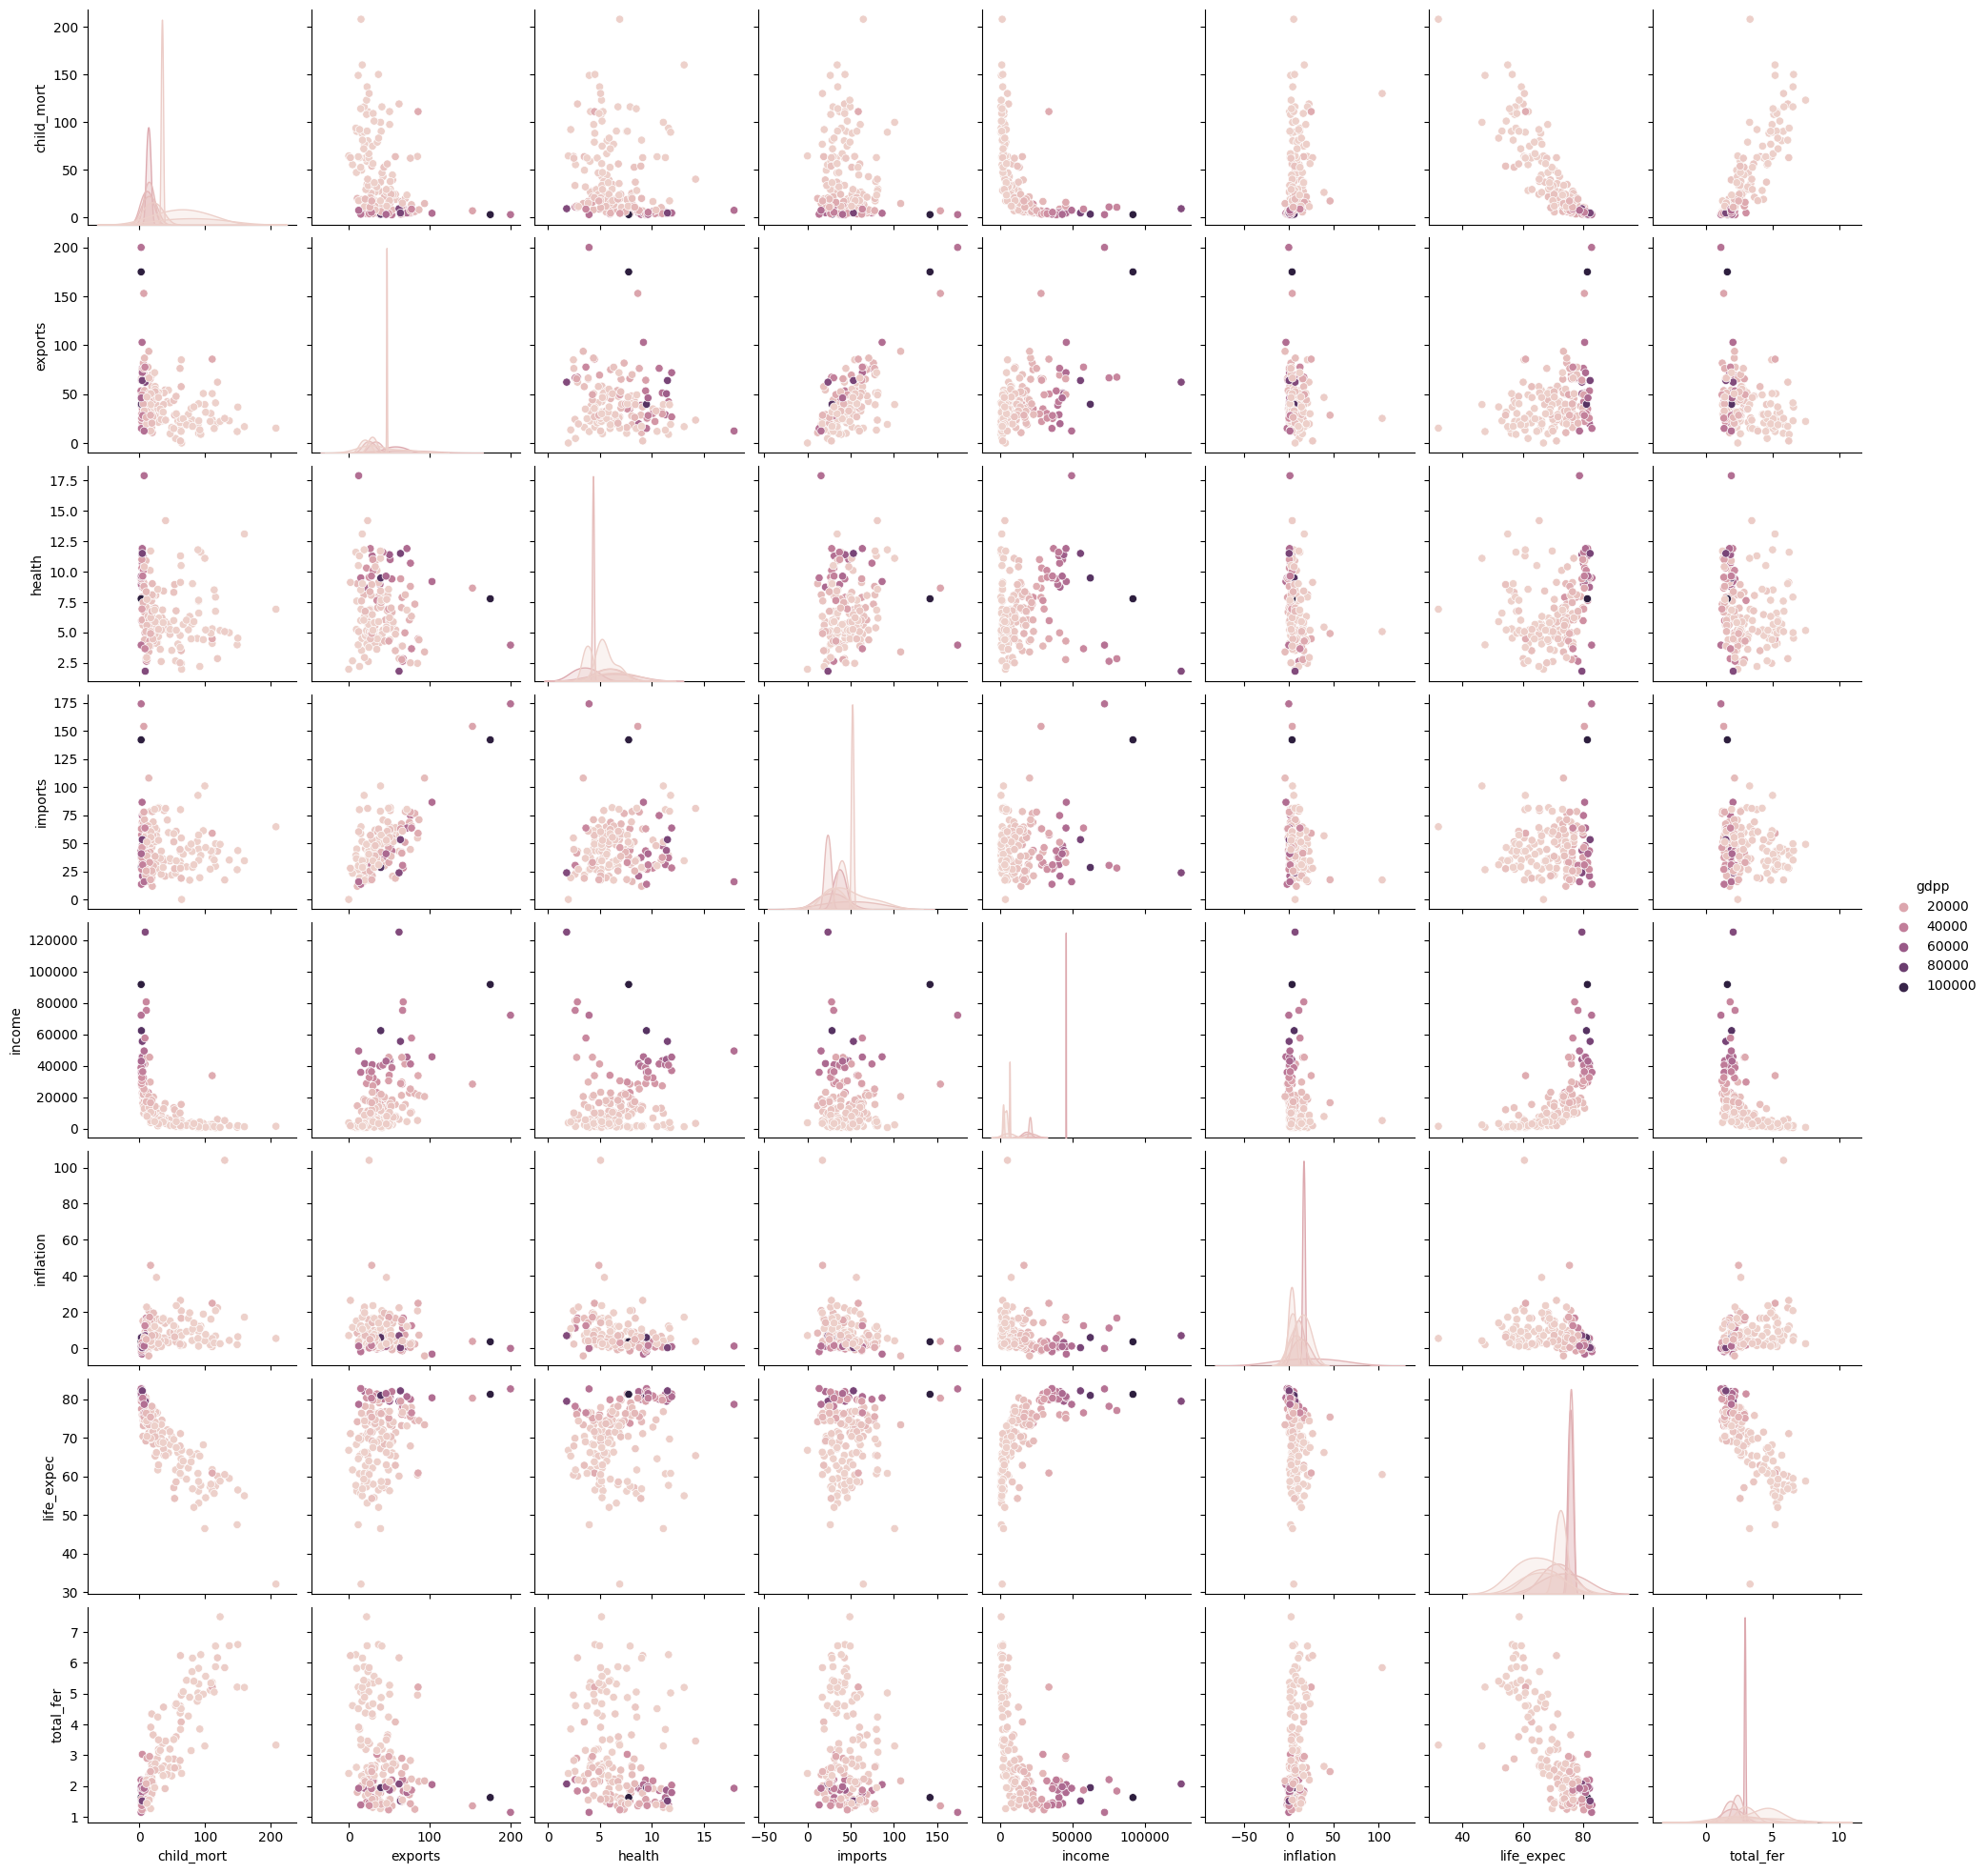

In [11]:
sb.pairplot(paises,hue="gdpp")

array([[<AxesSubplot: title={'center': 'child_mort'}>,
        <AxesSubplot: title={'center': 'exports'}>,
        <AxesSubplot: title={'center': 'health'}>],
       [<AxesSubplot: title={'center': 'imports'}>,
        <AxesSubplot: title={'center': 'income'}>,
        <AxesSubplot: title={'center': 'inflation'}>],
       [<AxesSubplot: title={'center': 'life_expec'}>,
        <AxesSubplot: title={'center': 'total_fer'}>,
        <AxesSubplot: title={'center': 'gdpp'}>]], dtype=object)

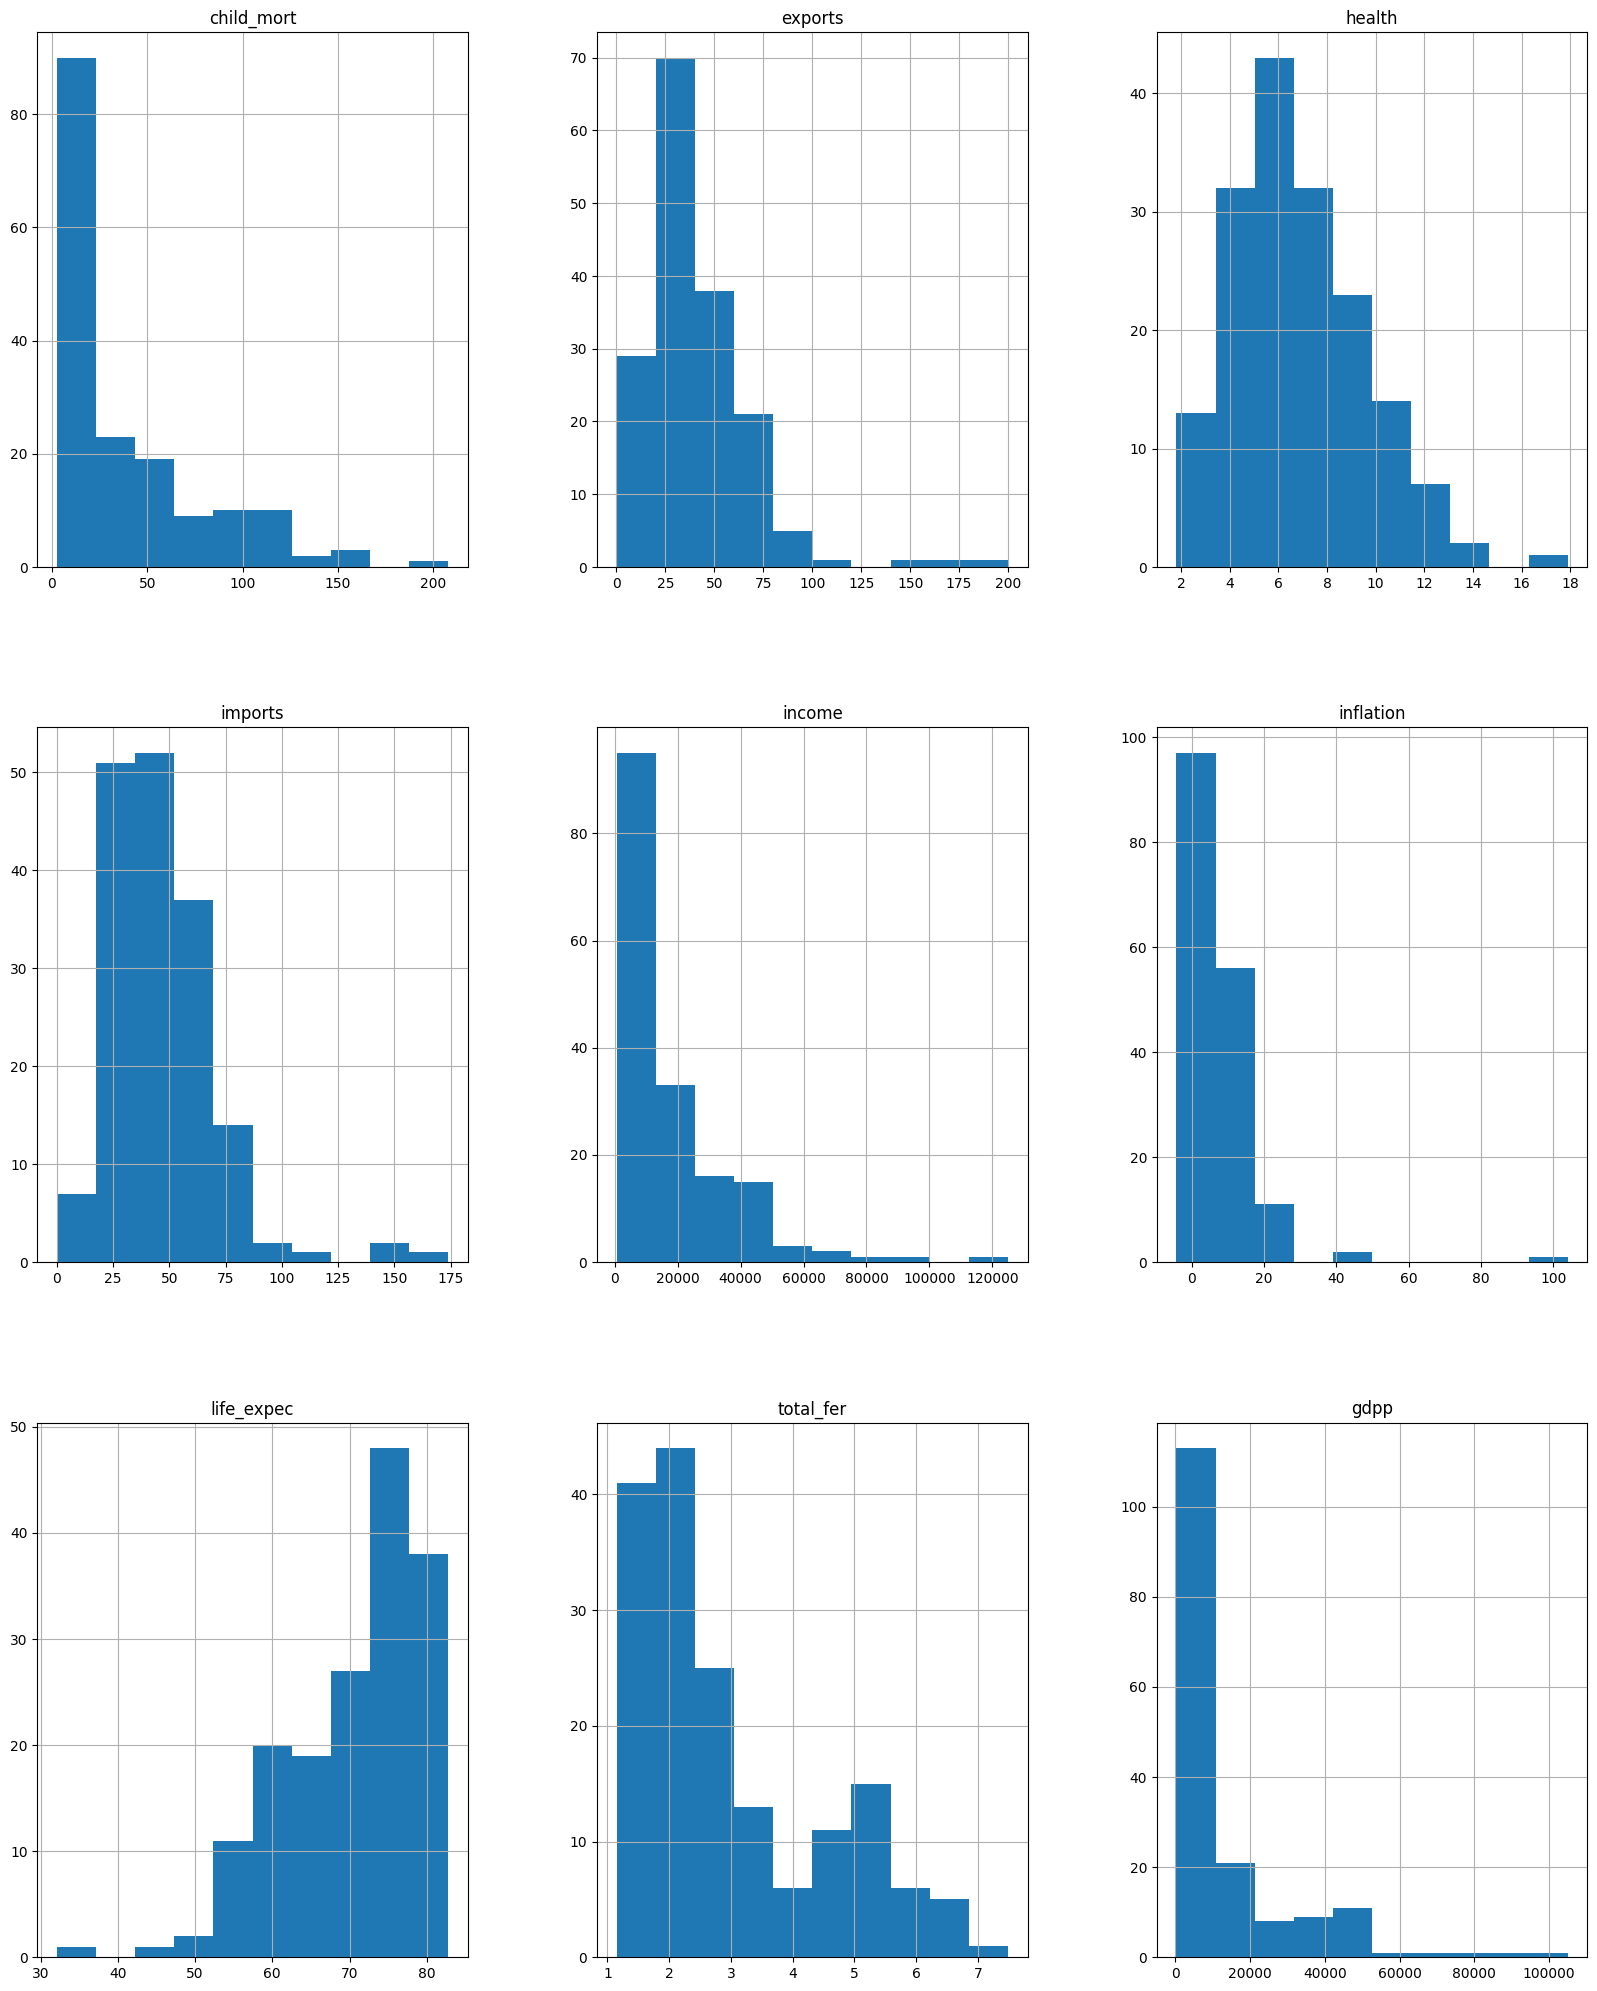

In [12]:
paises.hist(figsize = (20,25))

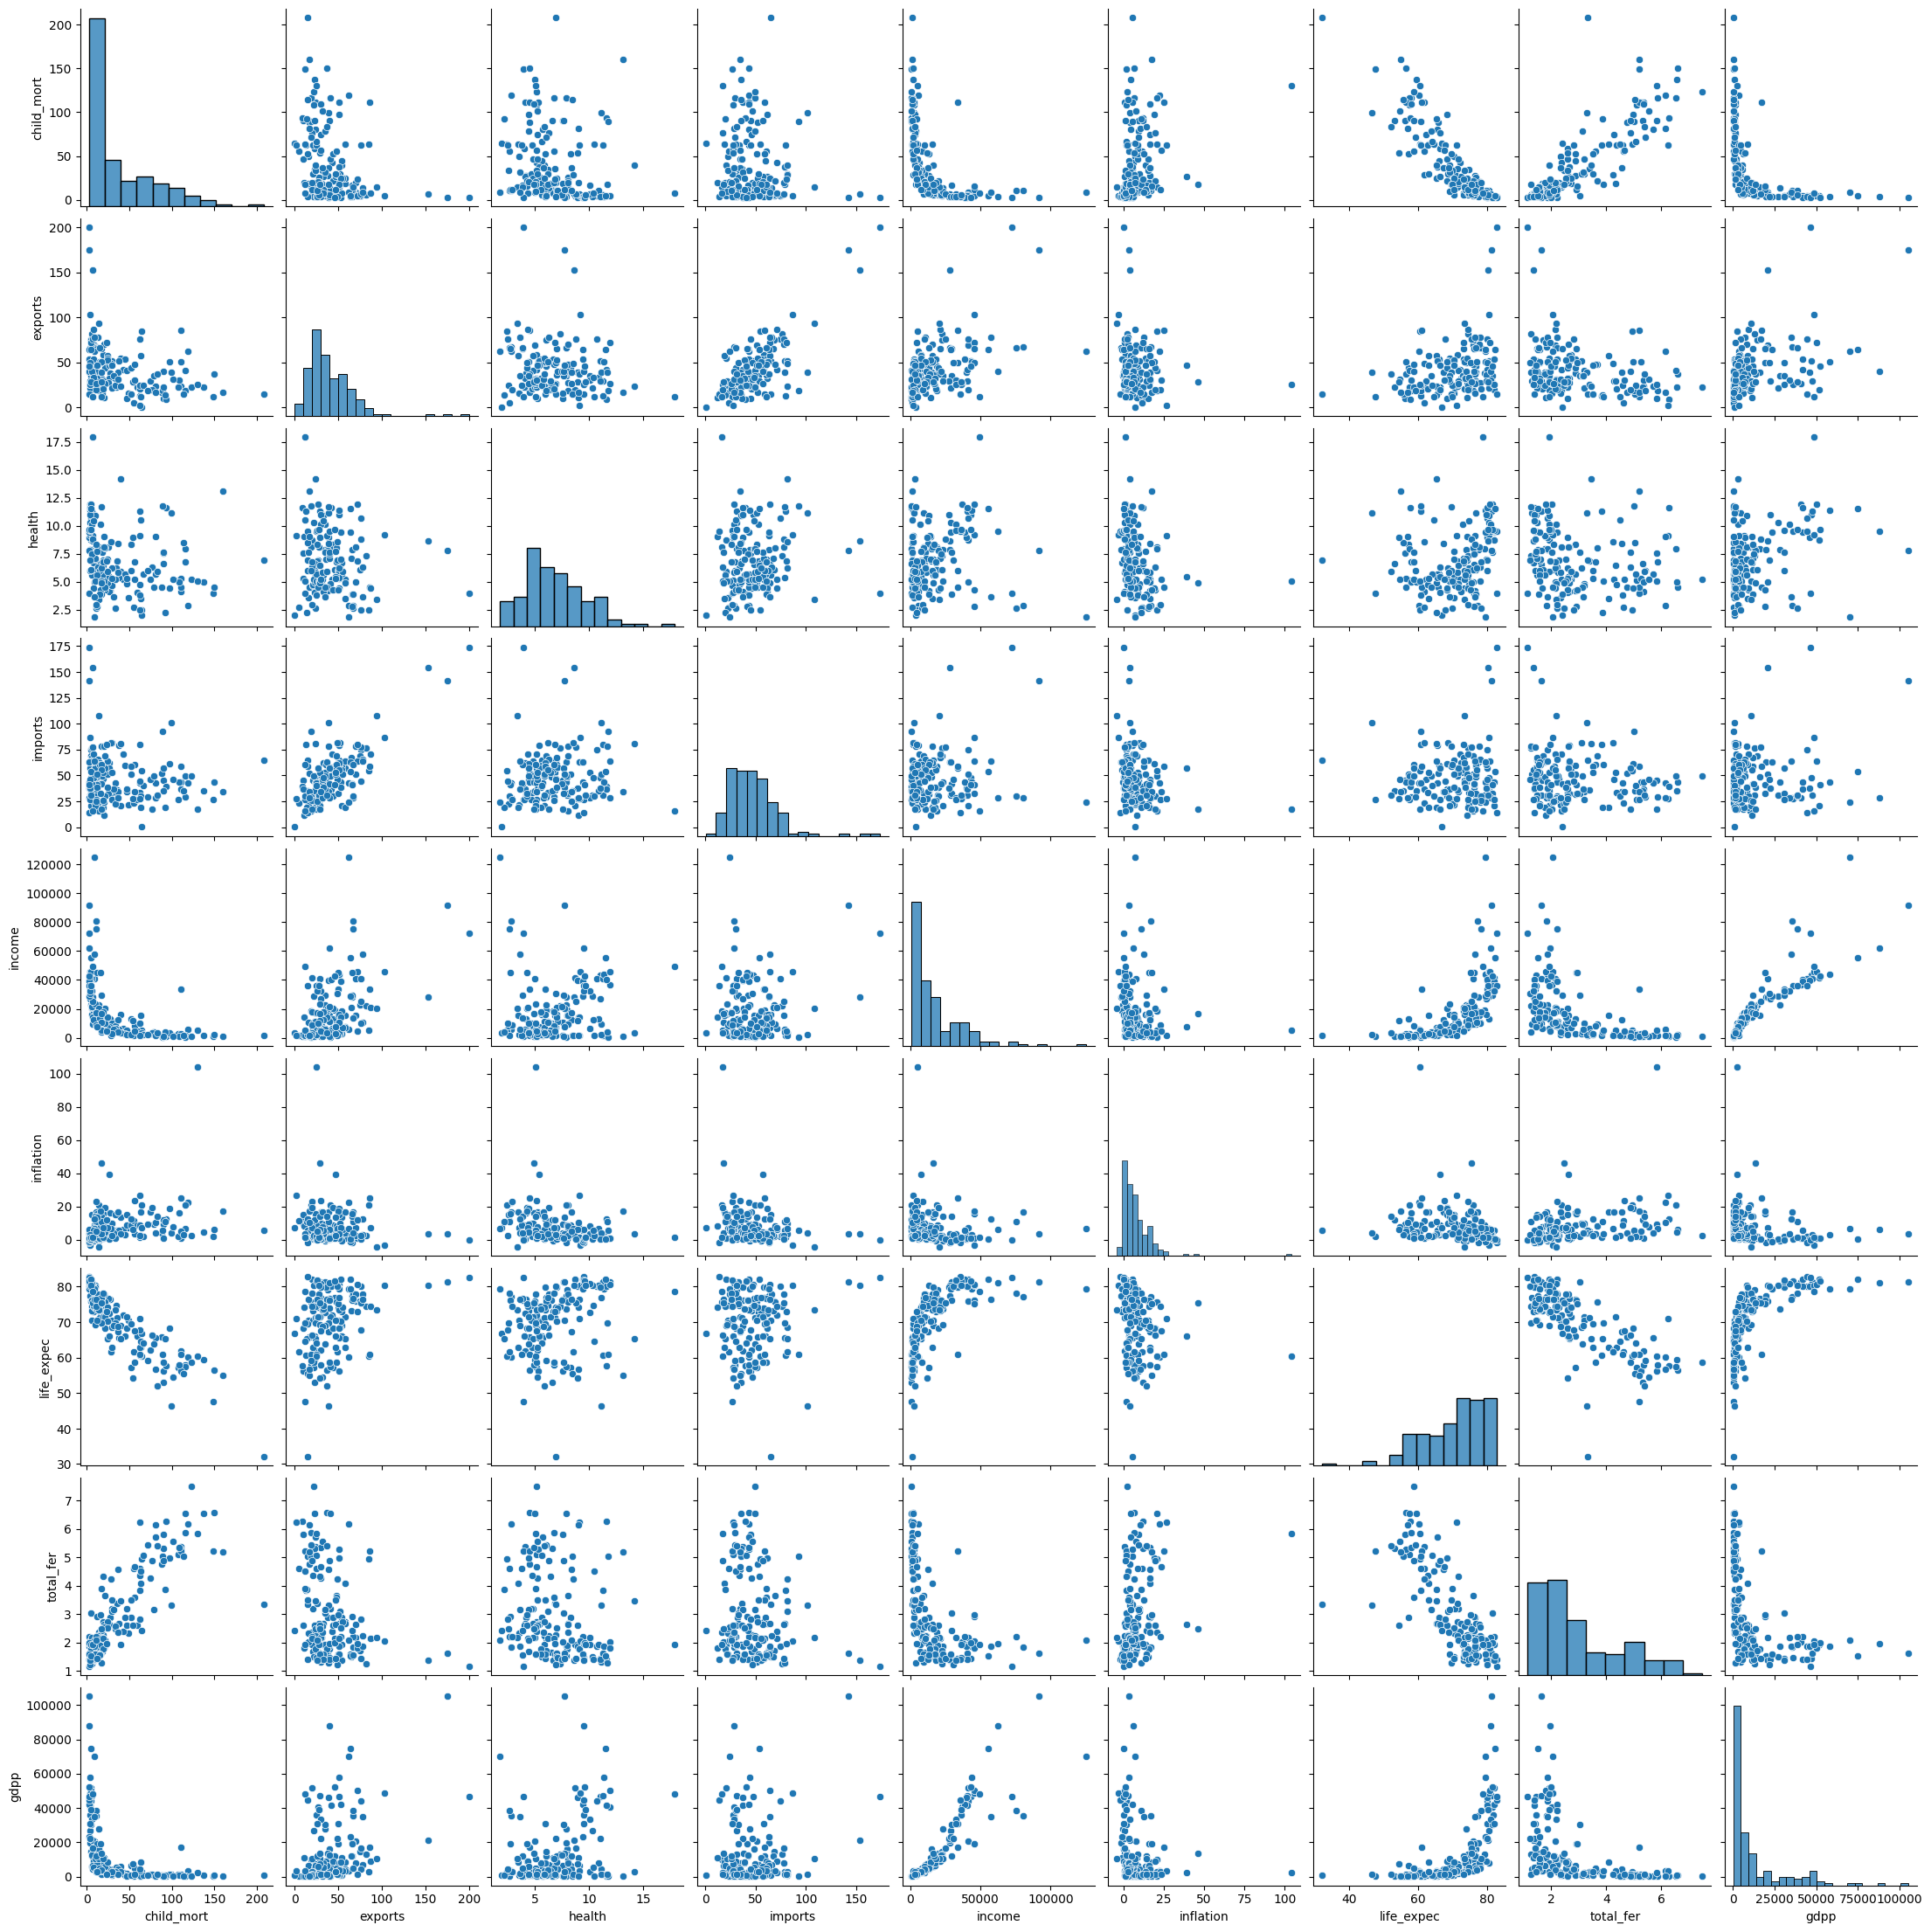

In [13]:
sb.pairplot(paises)

C:\Users\USER\AppData\Local\Temp\ipykernel_2184\4024391238.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = paises.corr()


<AxesSubplot: >

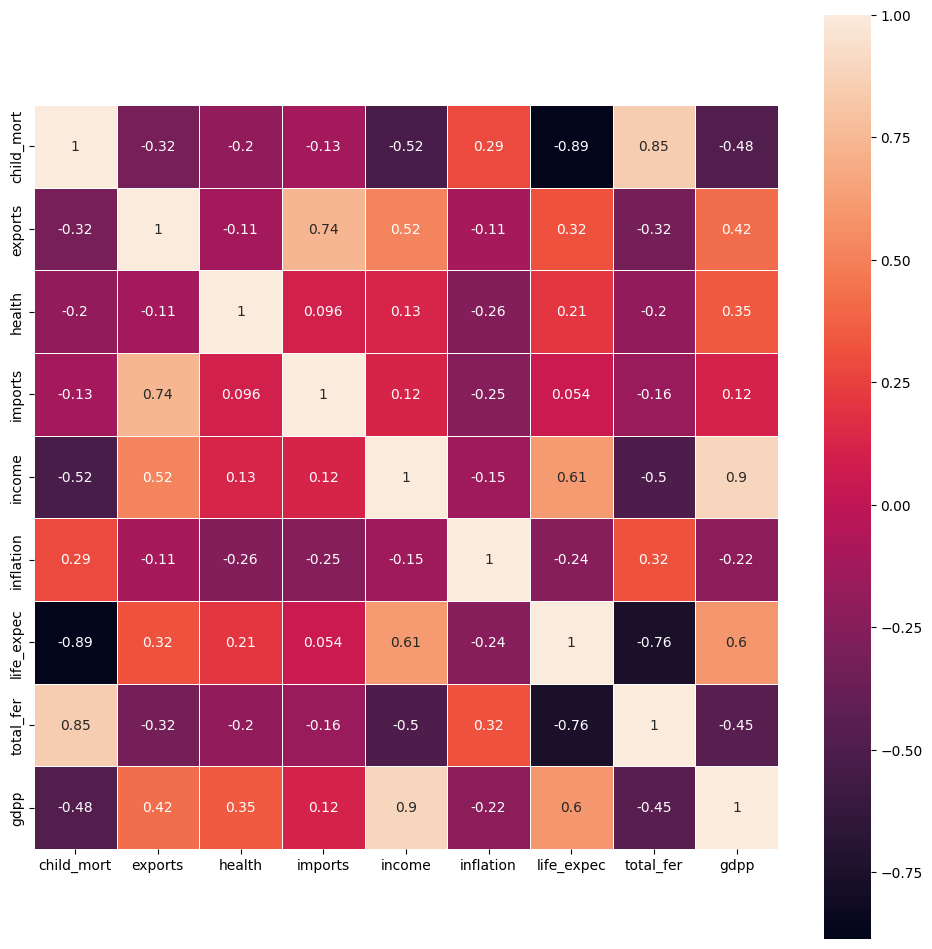

In [14]:
corr = paises.corr()
f, ax = plt.subplots(figsize=(12, 12))
sb.heatmap(corr, square=True, linewidths=.5, annot=True)

paises.hist(figsize = (20,25))

# Pré-Processamento:

In [15]:
dados = paises.drop(columns=['country'])
dados.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
from sklearn.preprocessing import MaxAbsScaler

normalizados = MaxAbsScaler().fit_transform(dados)
print(normalizados)

[[0.43365385 0.05       0.42346369 ... 0.67874396 0.77703605 0.00526667]
 [0.07980769 0.14       0.36592179 ... 0.92149758 0.22029372 0.03895238]
 [0.13125    0.192      0.23296089 ... 0.92391304 0.3858478  0.04247619]
 ...
 [0.11201923 0.36       0.38212291 ... 0.88285024 0.26034713 0.01247619]
 [0.27067308 0.15       0.28938547 ... 0.81521739 0.623498   0.01247619]
 [0.39951923 0.185      0.32905028 ... 0.62801932 0.72096128 0.01390476]]


# Clusterização

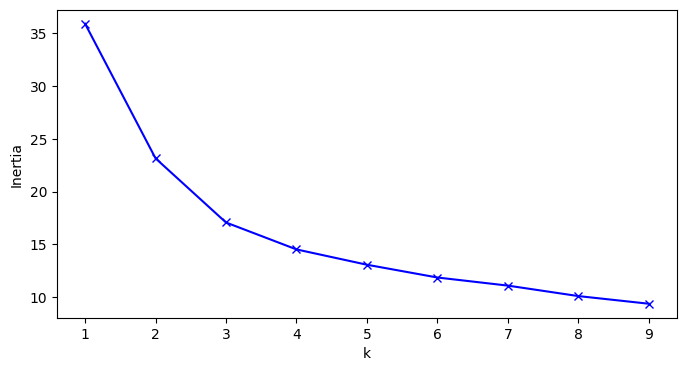

In [17]:
def plot_inertia(normalizados, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(normalizados)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(normalizados)

In [18]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(normalizados)

In [19]:
k_fit.cluster_centers_

array([[0.02357272, 0.28959375, 0.50368366, 0.29021193, 0.3798    ,
        0.02599459, 0.97203351, 0.23685748, 0.43172619],
       [0.45968094, 0.14205795, 0.35073641, 0.24161442, 0.02755145,
        0.11933894, 0.71689723, 0.68670348, 0.01548312],
       [0.10710059, 0.20668621, 0.35205967, 0.27567045, 0.10482901,
        0.07047348, 0.87533843, 0.3069734 , 0.06728226]])

In [20]:
clusters = k_fit.labels_
clusters

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [21]:
cluster_df = paises.copy()
cluster_df['cluster'] = clusters
cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [22]:
cluster_df.groupby('cluster').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_2184\1057986129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_df.groupby('cluster').mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,4.903125,57.918750,9.015937,50.496875,47475.000000,2.703438,80.484375,1.774062,45331.250000
1,95.613636,28.411591,6.278182,42.040909,3443.931818,12.411250,59.359091,5.143409,1625.727273
2,22.276923,41.337242,6.301868,47.966658,13103.626374,7.329242,72.478022,2.299231,7064.637363


In [23]:
def plot_cluster_points(paises, kmeans):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(paises), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(kmeans.labels_)
    sb.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)

# Resultado do Kmeans

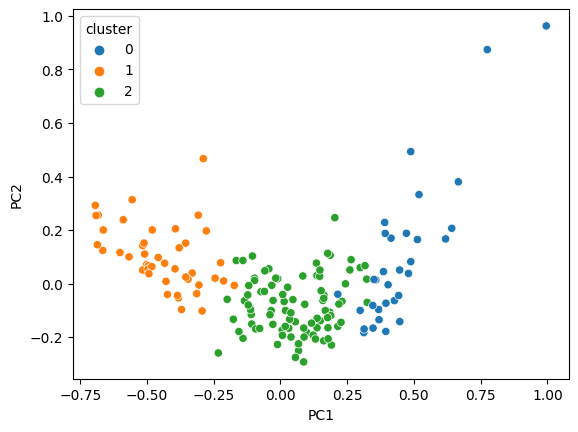

In [24]:
plot_cluster_points(normalizados, kmeans)

In [25]:
#Distribuição das dimensões em cada grupo:

In [26]:
cluster_df.pivot_table(index = ['cluster'], aggfunc ='size')

cluster
0    32
1    44
2    91
dtype: int64

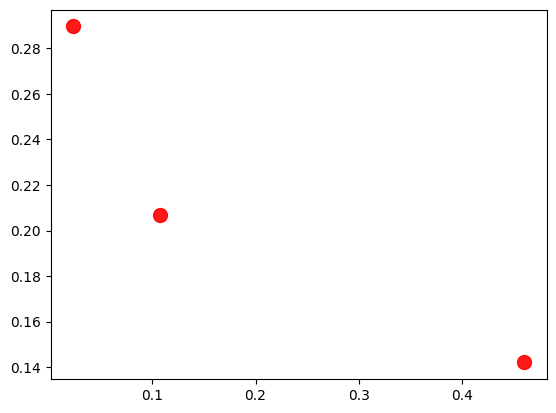

In [27]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=0.9)

# Resultado da Clusterização Hierárquica

In [28]:
df = cluster_df.set_index('country')

Text(0, 0.5, 'Euclidean Distance')

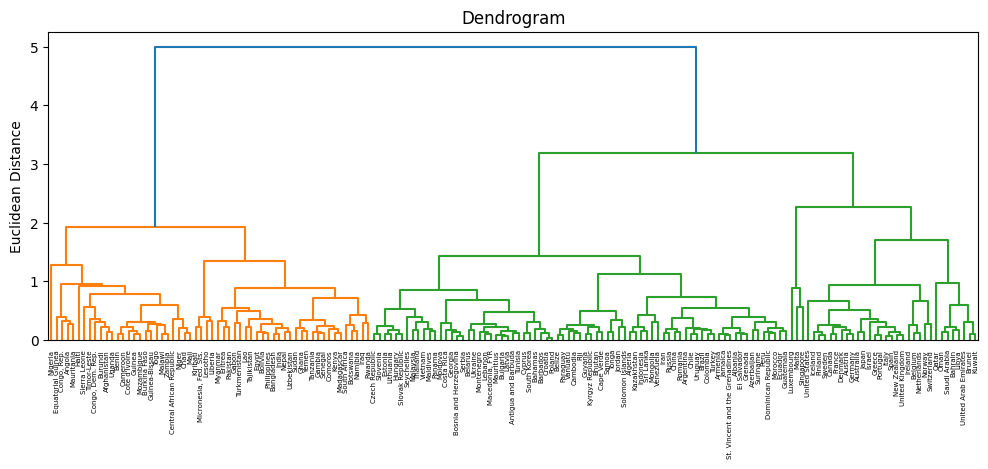

In [29]:
plt.figure(figsize=(12, 4))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(normalizados, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [30]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2


# Algoritmo com KMedoides

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(normalizados)
x_scaled = scaler.transform(normalizados)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [34]:
y_kmed

array([1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.15622507009665448


In [36]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.028795492864682717
0.2200012057811341
0.3019970682128177


In [37]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

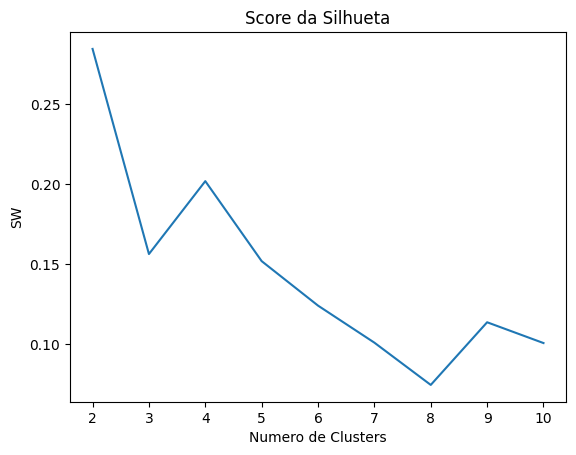

In [38]:
plt.plot(range(2, 11), sw)
plt.title('Score da Silhueta')
plt.xlabel('Numero de Clusters')
plt.ylabel('SW')
plt.show()

In [39]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [46]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(df.cluster,y_kmed)

0.7904191616766467

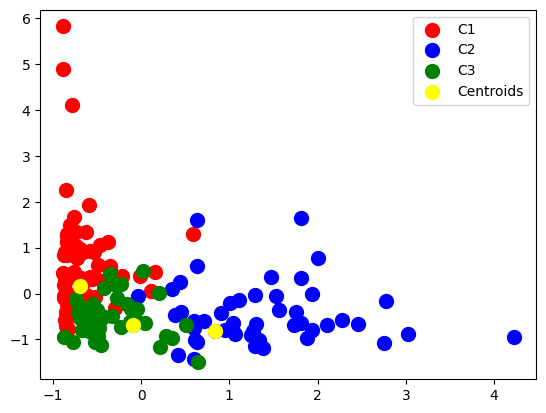

In [47]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Questões teoricas respondidas em documento PDF: